In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [2]:
# Work with uncleaned pitch data since they contain all columns
# cleaned has dropped some columns that may needed for this purpose
df = pd.read_csv('pitches_finalv2.csv',index_col = 0)

C:\ProgramData\Anaconda\envs\capstone\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# List of players to go through for now
player_list = ['Clayton Kershaw', 'Justin Verlander', 'Max Scherzer', 'Stephen Strasburg', 'Gerrit Cole',
              'Jacob deGrom', 'Zack Greinke', 'Madison Bumgarner', 'Marcus Stroman', 'Chris Sale', 'Hyun-Jin Ryu']

In [83]:
# Making sure this workflow will work
player = df[df['player_name'] == 'Hyun-Jin Ryu']

# Get pitch counts for each pitch
pitch_counts = player['pitch_name'].value_counts().values
# Total number of pitches
total = len(player)

# Convert to percentage
pitch_pct = pitch_counts/total*100

pcts = pd.DataFrame(pitch_pct, index = player['pitch_name'].value_counts().index)

# Drop non-pitches, set errors to ignore if they aren't present
pcts.drop(['Intentional Ball', 'Pitch Out'], inplace = True, errors='ignore')
# Drop pitches less than 0.5%
pcts.drop(pcts[pcts[0] < 0.5].index, axis=0, inplace=True)
# Pywaffle takes data in dictionary format
data = pcts[0].values
data

array([31.22602424, 24.53582937, 19.67162805, 14.79208225,  7.8870646 ,
        1.81064907])

In [84]:
# Get pitch label
pcts[0].index[0]

'4-Seam Fastball'

In [88]:
data

array([31.22602424, 24.53582937, 19.67162805, 14.79208225,  7.8870646 ,
        1.81064907])

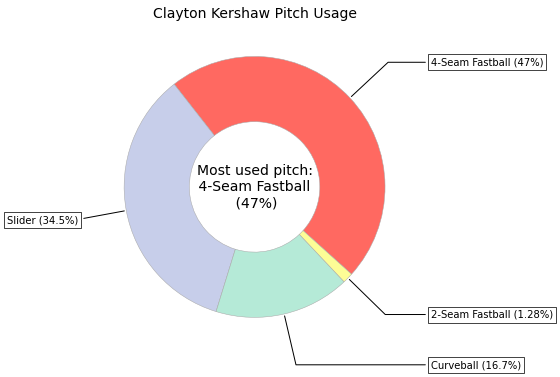

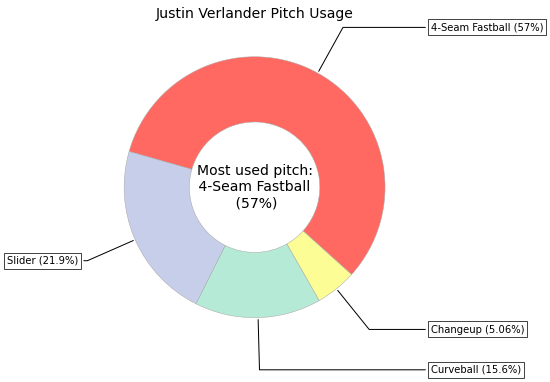

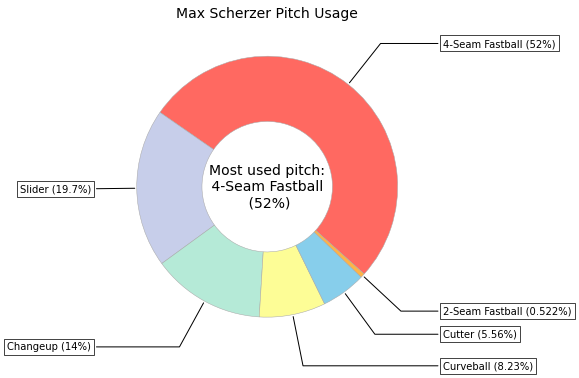

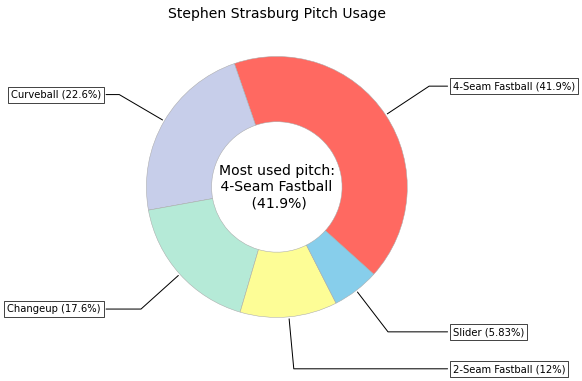

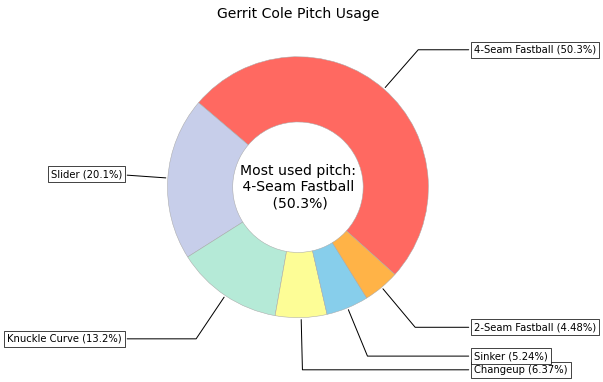

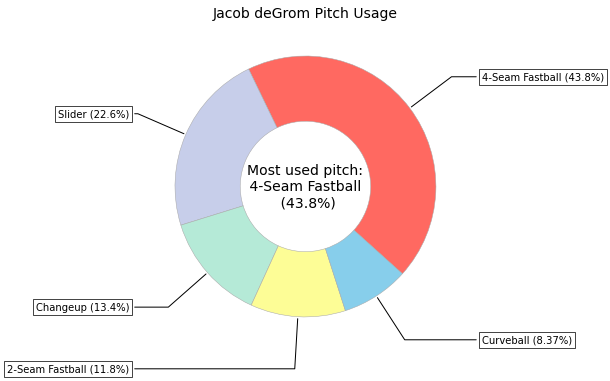

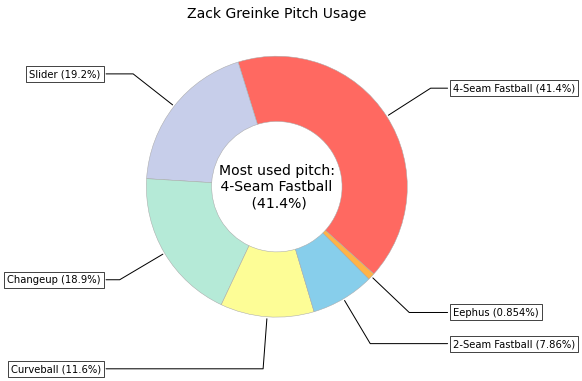

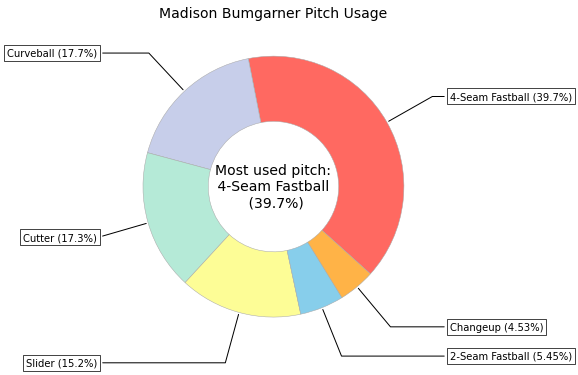

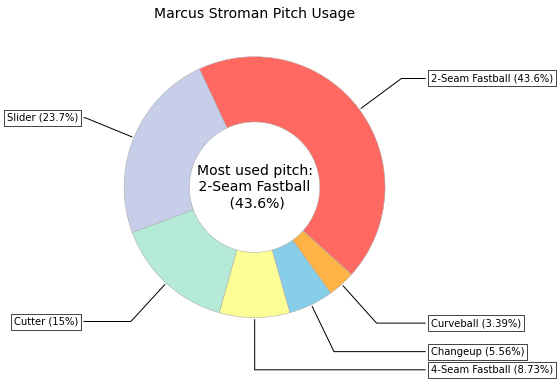

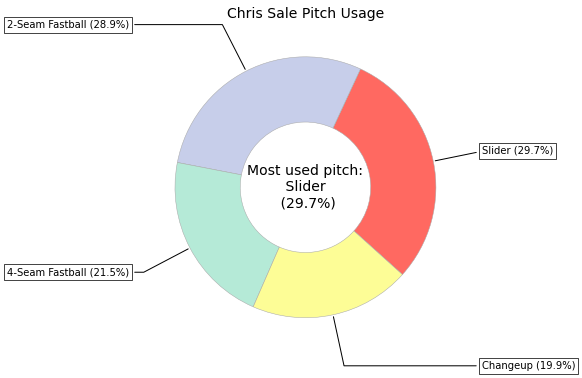

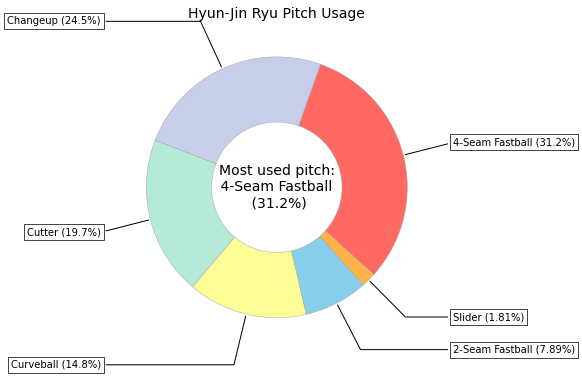

In [14]:
# Loop through and create plot for each player on list
for name in player_list: 
    # New df for each player in list
    player = df[df['player_name'] == name]
    
    # Get pitch counts for each pitch
    pitch_counts = player['pitch_name'].value_counts().values
    
    # Total # of pitches
    total = len(player)
    
    # Convert to percentage
    pitch_pct = pitch_counts/total*100
    # Turn to dataframe
    pcts = pd.DataFrame(pitch_pct, index = player['pitch_name'].value_counts().index)

    # Drop non-pitches, set errors to ignore if they aren't present
    pcts.drop(['Intentional Ball', 'Pitch Out'], inplace = True, errors='ignore')
    # Drop pitches less than 0.5%
    pcts.drop(pcts[pcts[0] < 0.5].index, axis=0, inplace=True)
    # Set data since pie charts work with arrays
    data = pcts[0].values

    # Code from matplotlib site https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
    fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

    # List of colours for chart sections, list 8 just in case
    # No pitch throws > 8 different pitches at > 5% frequency
    clist = ['#FF6961', '#C7CEEA', '#B5EAD7', '#fdfd96', '#87ceeb', '#ffb347', '#cfcfc4', '#77dd77']
    
    # Set the pie wedges, add darkgrey outline, set color palette
    # Set start angle for clearner chart (ie. minimize title/label overlap)
    wedges, texts = ax.pie(data, wedgeprops=dict(edgecolor = 'darkgrey', linewidth = 0.5, width=0.5), 
                           startangle=-42, colors = clist)
    
    # Create box/arrow labels for the wedges
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        
        # Annotate the wedges in pitch (usage%) formate
        ax.annotate(f'{pcts[0].index[i]} ({float(f"{data[i]:.3g}"):g}%)', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    # Text in center of donut
    # Use triple f string with ''' ''' for multi line text
    ax.text(0.5, 0.5, f'''Most used pitch:\n {pcts[0].index[0]} \n ({float(f"{data[0]:.3g}"):g}%)''', 
            fontsize=14, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_title(f'{name} Pitch Usage', fontsize = 14)
    plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/{name}_usage.png')
    plt.show()




***

Tried out waffle plots as well to show proportion of pitch usage but found donuts to be better

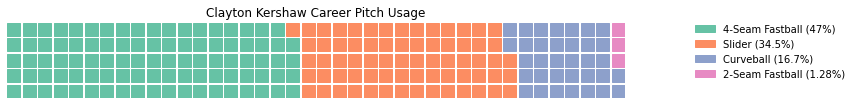

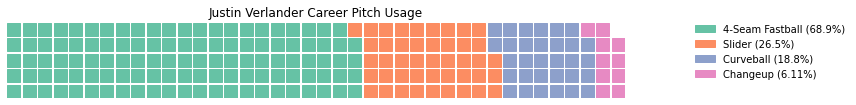

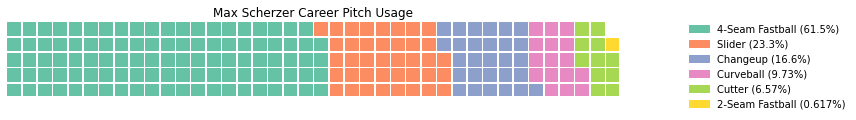

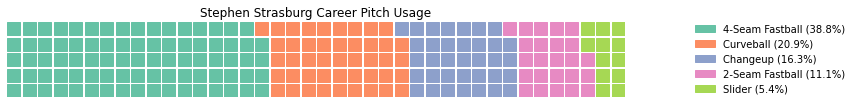

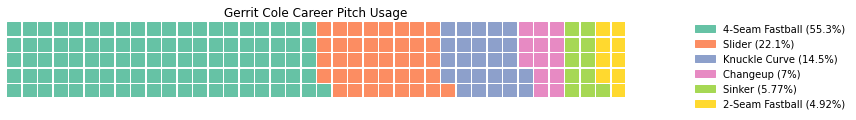

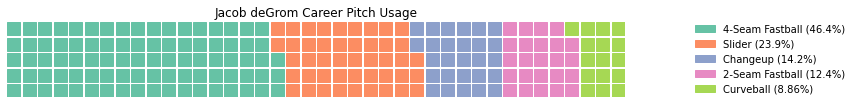

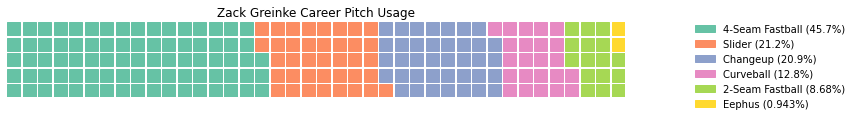

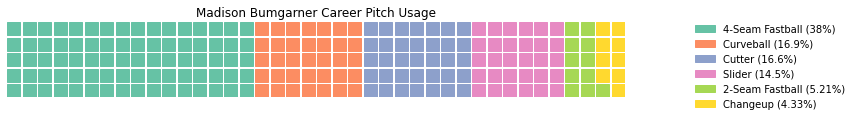

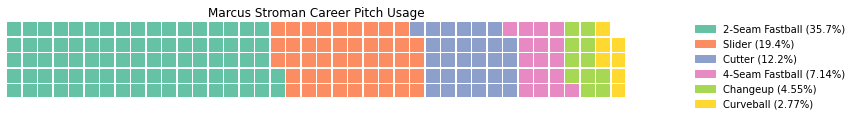

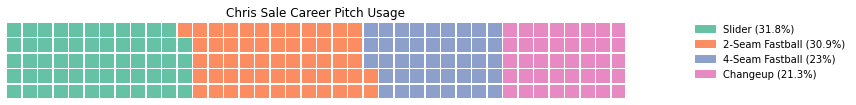

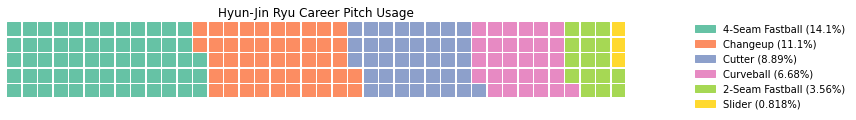

In [151]:
for name in player_list: 
    # New df for each player in list
    player = df[df['player_name'] == name]
    
    # Get pitch counts for each pitch
    pitch_counts = player['pitch_name'].value_counts().values
    
    # Convert to percentage
    pitch_pct = pitch_counts/total*100

    pcts = pd.DataFrame(pitch_pct, index = player['pitch_name'].value_counts().index)

    # Drop non-pitches, set errors to ignore if they aren't present
    pcts.drop(['Intentional Ball', 'Pitch Out'], inplace = True, errors='ignore')
    # Drop pitches less than 0.5%
    pcts.drop(pcts[pcts[0] < 0.5].index, axis=0, inplace=True)
    # Pywaffle takes data in dictionary format
    data = pcts[0].to_dict()

    # Create waffle plot
    # Chose waffle plot over pie chart for displaying relative proportions
    # Easier to see/infer from evenly distributed blocks vs area of circle slice
    fig = plt.figure(
        # Instatiate the Waffle plot
        FigureClass=Waffle,
        # Get 0.5% granularity for each block (ie. 200 (40x5) blocks)
        rows=5,
        columns = 40,
        values=data,
        figsize=(12, 8),  # figsize is a parameter of matplotlib.pyplot.figure
        # Loop through dict for labels and get key/value
        # Set percentage to 3 sig figs
        labels=[f"{k} ({float(f'{v:.3g}'):g}%)" for k, v in data.items()],
        # Set legend to left, transparent frame
        legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1.1), 'framealpha': 0}
    )
    plt.title(f'{name} Career Pitch Usage')
    # Save plots using f-string
    plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/{name}_usage.png')
    plt.show()

***